In [1]:
pip install jovian

  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 1.4 MB/s eta 0:00:00
  Created wheel for uuid: filename=uuid-1.30-py3-none-any.whl size=6479 sha256=d9ce44491989a682c70c8e8f7c240bec6e808a69d4727b179da2199b69620a2c
  Stored in directory: /root/.cache/pip/wheels/ed/08/9e/f0a977dfe55051a07e21af89200125d65f1efa60cbac61ed88
Successfully built uuid
Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearn.feature_selection import mutual_info_regression
#this upper 1 for co_rellation
import os
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [3]:
diabetes1_df=pd.read_csv('/kaggle/input/diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv')
diabetes1_df

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
253675           0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676           2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677           0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678           0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679           2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                        0.0           0.0     0.0  ...            1.0   
1                        0.0           1.0     0.0  ...            0.0   
2                        0.0           0.0     1.0  ...            1.0   
3                        0.0           1.0     1.0  ...            1.0   
4                        0.0           1.0     1.0  ...            1.0   
...                      ...           ...     ...  ...            ...   
253675                   0.0           0.0     1.0  ...            1.0   
253676                   0.0           0.0     0.0  ...            1.0   
253677                   0.0           1.0     1.0  ...            1.0   
253678                   0.0           0.0     1.0  ...            1.0   
253679                   1.0           1.0     1.0  ...            1.0   

        NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
0               0.0      5.0      18.0      15.0       1.0  0.0   9.0   
1               1.0      3.0       0.0       0.0       0.0  0.0   7.0   
2               1.0      5.0      30.0      30.0       1.0  0.0   9.0   
3               0.0      2.0       0.0       0.0       0.0  0.0  11.0   
4               0.0      2.0       3.0       0.0       0.0  0.0  11.0   
...             ...      ...       ...       ...       ...  ...   ...   
253675          0.0      3.0       0.0       5.0       0.0  1.0   5.0   
253676          0.0      4.0       0.0       0.0       1.0  0.0  11.0   
253677          0.0      1.0       0.0       0.0       0.0  0.0   2.0   
253678          0.0      3.0       0.0       0.0       0.0  1.0   7.0   
253679          0.0      2.0       0.0       0.0       0.0  0.0   9.0   

        Education  Income  
0             4.0     3.0  
1             6.0     1.0  
2             4.0     8.0  
3             3.0     6.0  
4             5.0     4.0  
...           ...     ...  
253675        6.0     7.0  
253676        2.0     4.0  
253677        5.0     2.0  
253678        5.0     1.0  
253679        6.0     2.0  

[253680 rows x 22 columns]

In [4]:
diabetes1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
diabetes1_df.astype(int)

Diabetes_012  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0                  0       1         1          1   40       1       0   
1                  0       0         0          0   25       1       0   
2                  0       1         1          1   28       0       0   
3                  0       1         0          1   27       0       0   
4                  0       1         1          1   24       0       0   
...              ...     ...       ...        ...  ...     ...     ...   
253675             0       1         1          1   45       0       0   
253676             2       1         1          1   18       0       0   
253677             0       0         0          1   28       0       0   
253678             0       1         0          1   23       0       0   
253679             2       1         1          1   25       0       0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                          0             0       0  ...              1   
1                          0             1       0  ...              0   
2                          0             0       1  ...              1   
3                          0             1       1  ...              1   
4                          0             1       1  ...              1   
...                      ...           ...     ...  ...            ...   
253675                     0             0       1  ...              1   
253676                     0             0       0  ...              1   
253677                     0             1       1  ...              1   
253678                     0             0       1  ...              1   
253679                     1             1       1  ...              1   

        NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  \
0                 0        5        18        15         1    0    9   
1                 1        3         0         0         0    0    7   
2                 1        5        30        30         1    0    9   
3                 0        2         0         0         0    0   11   
4                 0        2         3         0         0    0   11   
...             ...      ...       ...       ...       ...  ...  ...   
253675            0        3         0         5         0    1    5   
253676            0        4         0         0         1    0   11   
253677            0        1         0         0         0    0    2   
253678            0        3         0         0         0    1    7   
253679            0        2         0         0         0    0    9   

        Education  Income  
0               4       3  
1               6       1  
2               4       8  
3               3       6  
4               5       4  
...           ...     ...  
253675          6       7  
253676          2       4  
253677          5       2  
253678          5       1  
253679          6       2  

[253680 rows x 22 columns]

In [6]:
round(diabetes1_df.describe().T,2)

count   mean   std   min   25%   50%   75%   max
Diabetes_012          253680.0   0.30  0.70   0.0   0.0   0.0   0.0   2.0
HighBP                253680.0   0.43  0.49   0.0   0.0   0.0   1.0   1.0
HighChol              253680.0   0.42  0.49   0.0   0.0   0.0   1.0   1.0
CholCheck             253680.0   0.96  0.19   0.0   1.0   1.0   1.0   1.0
BMI                   253680.0  28.38  6.61  12.0  24.0  27.0  31.0  98.0
Smoker                253680.0   0.44  0.50   0.0   0.0   0.0   1.0   1.0
Stroke                253680.0   0.04  0.20   0.0   0.0   0.0   0.0   1.0
HeartDiseaseorAttack  253680.0   0.09  0.29   0.0   0.0   0.0   0.0   1.0
PhysActivity          253680.0   0.76  0.43   0.0   1.0   1.0   1.0   1.0
Fruits                253680.0   0.63  0.48   0.0   0.0   1.0   1.0   1.0
Veggies               253680.0   0.81  0.39   0.0   1.0   1.0   1.0   1.0
HvyAlcoholConsump     253680.0   0.06  0.23   0.0   0.0   0.0   0.0   1.0
AnyHealthcare         253680.0   0.95  0.22   0.0   1.0   1.0   1.0   1.0
NoDocbcCost           253680.0   0.08  0.28   0.0   0.0   0.0   0.0   1.0
GenHlth               253680.0   2.51  1.07   1.0   2.0   2.0   3.0   5.0
MentHlth              253680.0   3.18  7.41   0.0   0.0   0.0   2.0  30.0
PhysHlth              253680.0   4.24  8.72   0.0   0.0   0.0   3.0  30.0
DiffWalk              253680.0   0.17  0.37   0.0   0.0   0.0   0.0   1.0
Sex                   253680.0   0.44  0.50   0.0   0.0   0.0   1.0   1.0
Age                   253680.0   8.03  3.05   1.0   6.0   8.0  10.0  13.0
Education             253680.0   5.05  0.99   1.0   4.0   5.0   6.0   6.0
Income                253680.0   6.05  2.07   1.0   5.0   7.0   8.0   8.0

In [7]:
diabetes1_df.duplicated().sum()

23899

In [8]:
diabetes1_df.drop_duplicates(inplace=True)
diabetes1_df

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
253675           0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676           2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677           0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678           0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679           2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                        0.0           0.0     0.0  ...            1.0   
1                        0.0           1.0     0.0  ...            0.0   
2                        0.0           0.0     1.0  ...            1.0   
3                        0.0           1.0     1.0  ...            1.0   
4                        0.0           1.0     1.0  ...            1.0   
...                      ...           ...     ...  ...            ...   
253675                   0.0           0.0     1.0  ...            1.0   
253676                   0.0           0.0     0.0  ...            1.0   
253677                   0.0           1.0     1.0  ...            1.0   
253678                   0.0           0.0     1.0  ...            1.0   
253679                   1.0           1.0     1.0  ...            1.0   

        NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
0               0.0      5.0      18.0      15.0       1.0  0.0   9.0   
1               1.0      3.0       0.0       0.0       0.0  0.0   7.0   
2               1.0      5.0      30.0      30.0       1.0  0.0   9.0   
3               0.0      2.0       0.0       0.0       0.0  0.0  11.0   
4               0.0      2.0       3.0       0.0       0.0  0.0  11.0   
...             ...      ...       ...       ...       ...  ...   ...   
253675          0.0      3.0       0.0       5.0       0.0  1.0   5.0   
253676          0.0      4.0       0.0       0.0       1.0  0.0  11.0   
253677          0.0      1.0       0.0       0.0       0.0  0.0   2.0   
253678          0.0      3.0       0.0       0.0       0.0  1.0   7.0   
253679          0.0      2.0       0.0       0.0       0.0  0.0   9.0   

        Education  Income  
0             4.0     3.0  
1             6.0     1.0  
2             4.0     8.0  
3             3.0     6.0  
4             5.0     4.0  
...           ...     ...  
253675        6.0     7.0  
253676        2.0     4.0  
253677        5.0     2.0  
253678        5.0     1.0  
253679        6.0     2.0  

[229781 rows x 22 columns]

In [9]:
from ydata_profiling import ProfileReport
profile=ProfileReport(diabetes1_df,explorative=True,dark_mode=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
diabetes1_df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [11]:
unique_values ={}
for i in diabetes1_df.columns:
    unique_values[i] = diabetes1_df[i].nunique()
    
pd.DataFrame(unique_values, index= ['unique_values']).T    

unique_values
Diabetes_012                      3
HighBP                            2
HighChol                          2
CholCheck                         2
BMI                              84
Smoker                            2
Stroke                            2
HeartDiseaseorAttack              2
PhysActivity                      2
Fruits                            2
Veggies                           2
HvyAlcoholConsump                 2
AnyHealthcare                     2
NoDocbcCost                       2
GenHlth                           5
MentHlth                         31
PhysHlth                         31
DiffWalk                          2
Sex                               2
Age                              13
Education                         6
Income                            8

In [12]:
diabetes1_df.corr()['Diabetes_012'].sort_values(ascending=False)

Diabetes_012            1.000000
GenHlth                 0.284881
HighBP                  0.261976
BMI                     0.212027
DiffWalk                0.210638
HighChol                0.203327
Age                     0.184642
HeartDiseaseorAttack    0.170816
PhysHlth                0.160485
Stroke                  0.100276
CholCheck               0.075701
MentHlth                0.057698
Smoker                  0.046774
Sex                     0.032243
AnyHealthcare           0.024911
NoDocbcCost             0.023568
Fruits                 -0.025462
Veggies                -0.043446
HvyAlcoholConsump      -0.067164
PhysActivity           -0.103408
Education              -0.107742
Income                 -0.147102
Name: Diabetes_012, dtype: float64

In [13]:
px.scatter(diabetes1_df.sample(20000),
          x='BMI',
           y='Age',
           title='BMI with age',
           color='Diabetes_012')

In [14]:
px.scatter(diabetes1_df.sample(20000),
          x='PhysHlth',
           y='Income',
           title='BMI with phyhealth',
           color='Diabetes_012')

In [15]:
px.scatter(diabetes1_df.sample(20000),
          x='GenHlth',
           y='MentHlth',
           title='BMI with age',
           color='Diabetes_012')

In [16]:
df = diabetes1_df.iloc[:200000]
count_0=df['Diabetes_012'].eq(0).sum()
count_1=df['Diabetes_012'].eq(1).sum()
count_2=df['Diabetes_012'].eq(2).sum()

print("count 0",count_0)
print("count 1",count_1)
print("count 2",count_2)

count 0 165504
count 1 4029
count 2 30467


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version

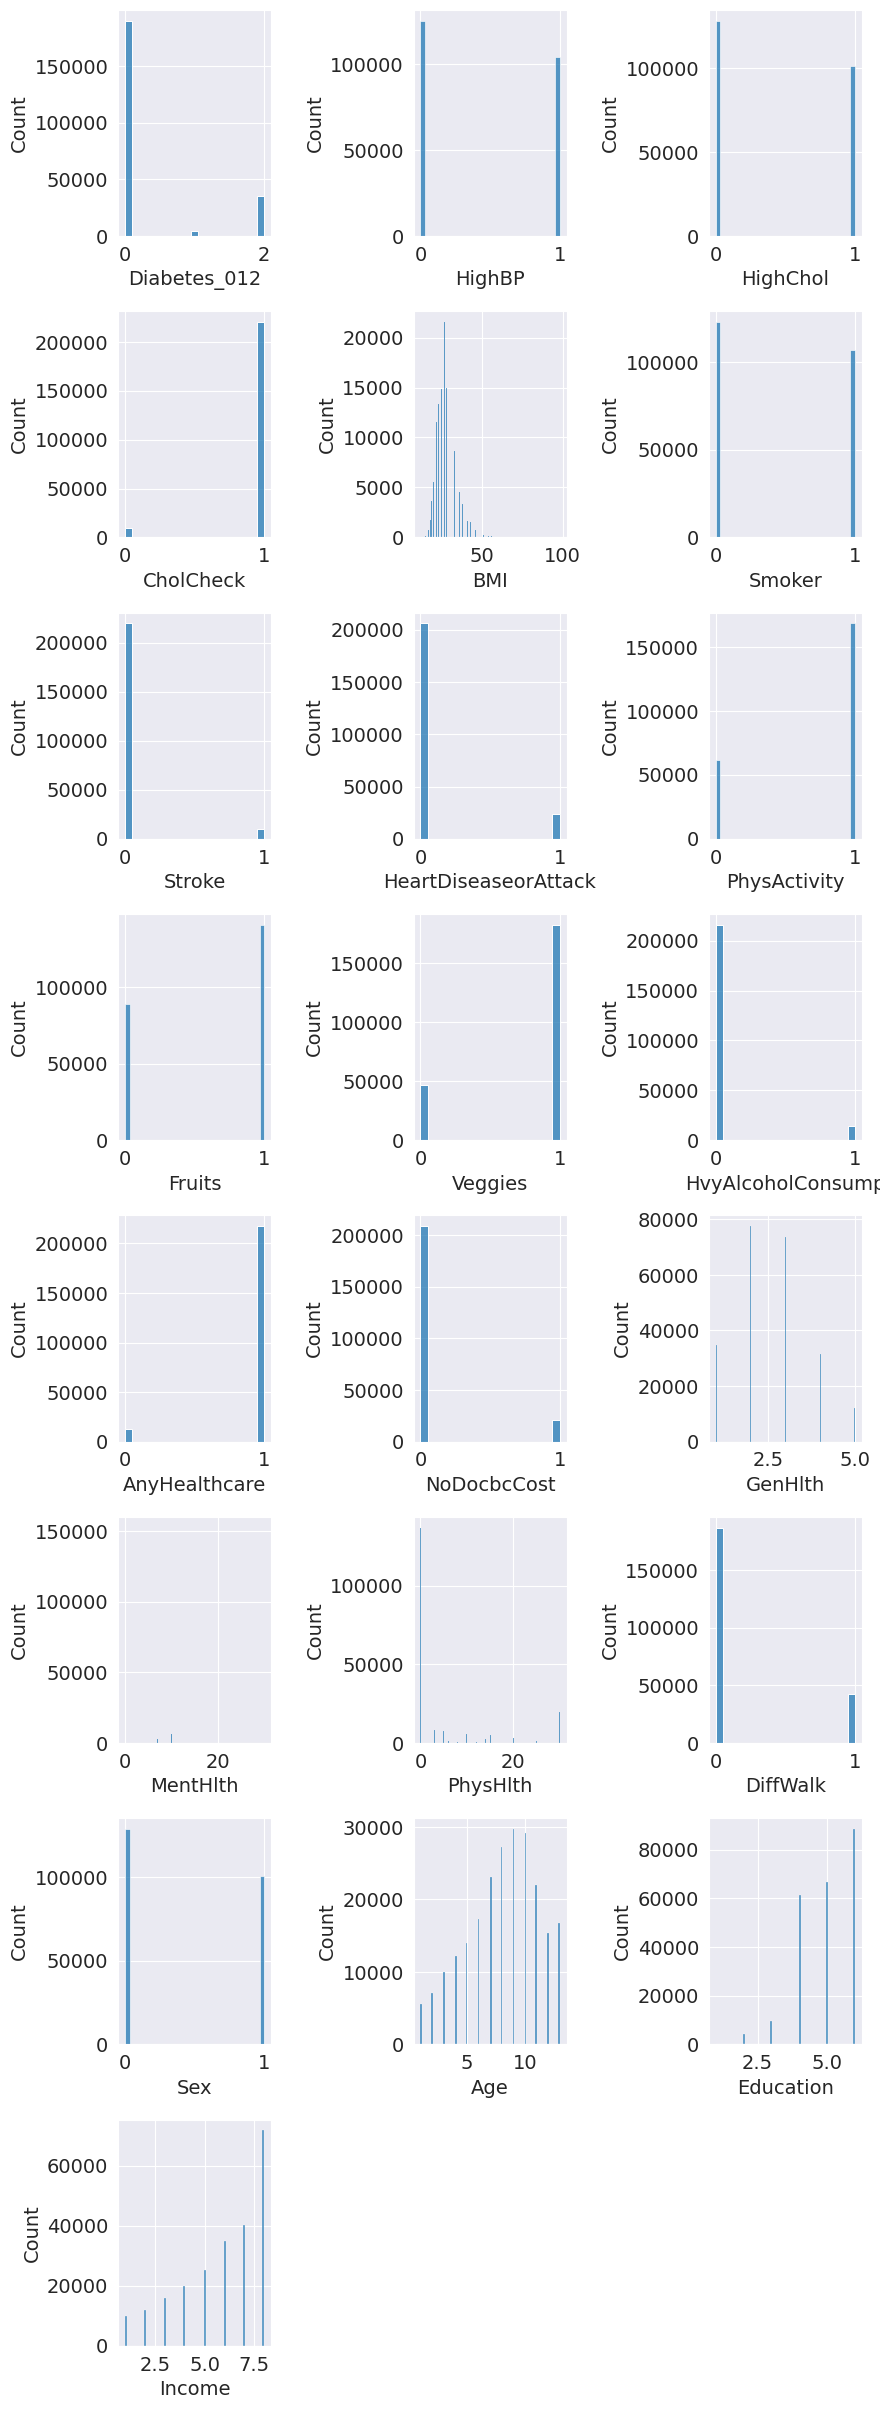

In [17]:
num_rows = len(diabetes1_df.columns) + 2
plt.figure(figsize=(9, num_rows * 3))
for i, col in enumerate(diabetes1_df.columns):
    plt.subplot(num_rows, 3, i + 1)
    sns.histplot(data=diabetes1_df, x=col , multiple='stack')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

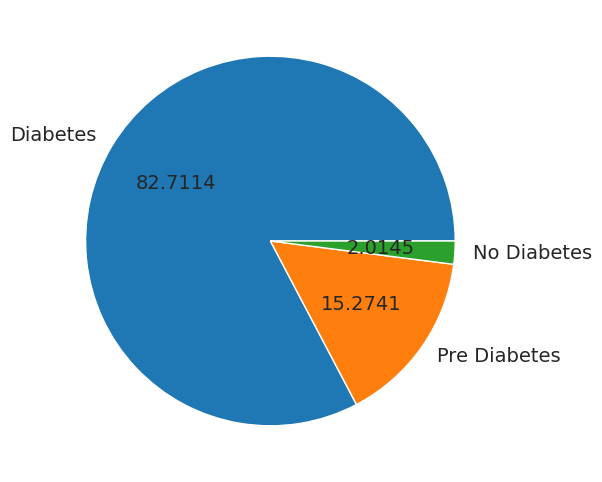

In [18]:
plt.pie(x=diabetes1_df.Diabetes_012.value_counts() ,labels=['Diabetes', 'Pre Diabetes', 'No Diabetes'], autopct='%.04f');

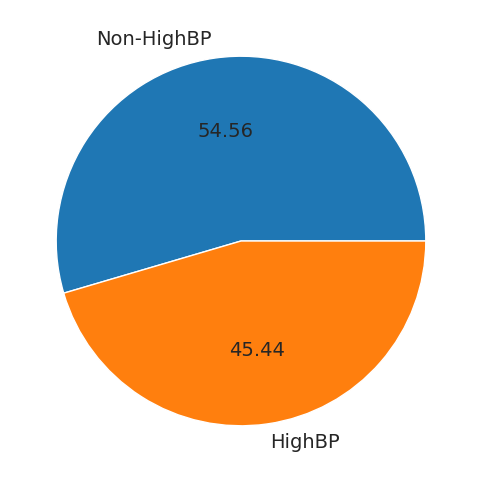

In [19]:
plt.pie(diabetes1_df.HighBP.value_counts() , labels = ['Non-HighBP' , 'HighBP'] , autopct='%.2f');

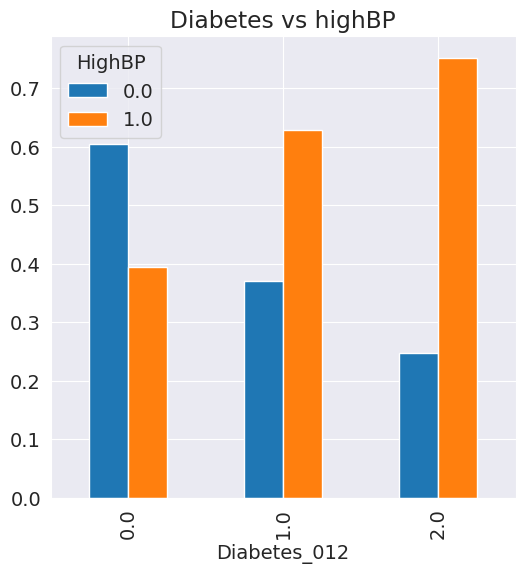

In [20]:
details= pd.crosstab(index=diabetes1_df['Diabetes_012'], columns=diabetes1_df['HighBP'], normalize='index')
details.plot(kind = 'bar' , figsize = (6,6), title='Diabetes vs highBP');

Peple who have high-preasure have a good chance to get diabetes

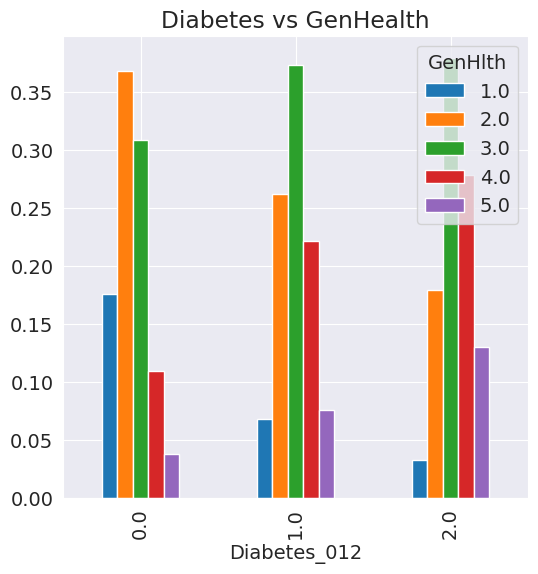

In [21]:
details=pd.crosstab(index=diabetes1_df['Diabetes_012'], columns=diabetes1_df['GenHlth'],normalize='index')
details.plot(kind='bar',figsize = (6,6), title='Diabetes vs GenHealth');

People who have score 3-4 in GenHealth Have a bit chace to get Diabetes

In [22]:
diabetes1_df.GenHlth.unique()

array([5., 3., 2., 4., 1.])

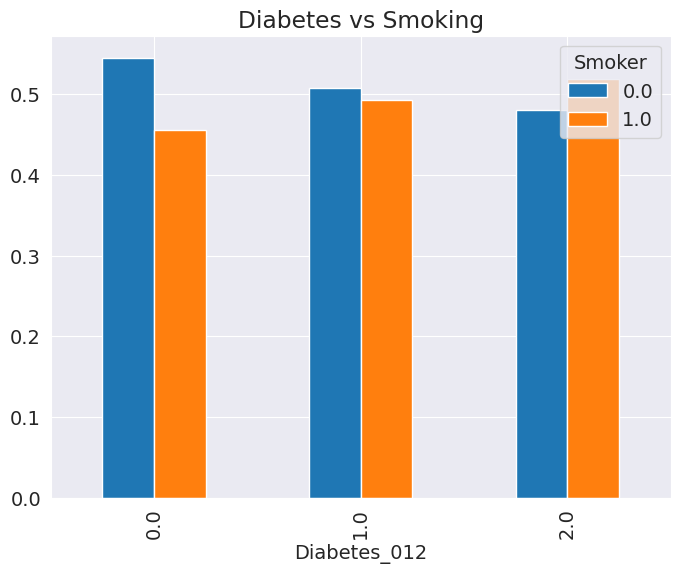

In [23]:
details=pd.crosstab(index=diabetes1_df['Diabetes_012'], columns=diabetes1_df['Smoker'],normalize='index')
details.plot(kind='bar',figsize = (8,6), title='Diabetes vs Smoking');

Smoking can be a cause for Diabetes.

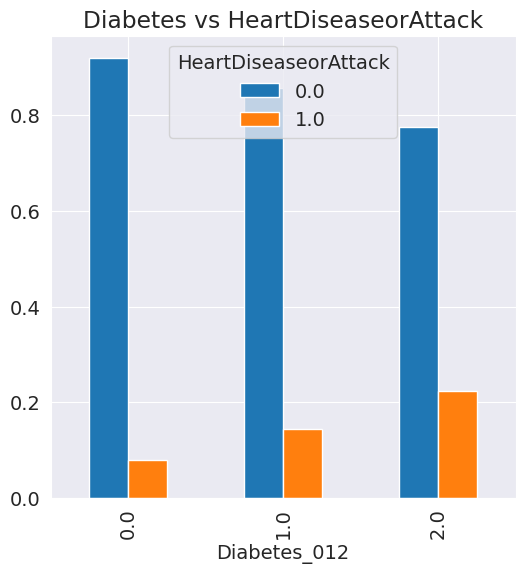

In [24]:
details=pd.crosstab(index=diabetes1_df['Diabetes_012'], columns=diabetes1_df['HeartDiseaseorAttack'],normalize='index')
details.plot(kind='bar',figsize = (6,6), title='Diabetes vs HeartDiseaseorAttack');

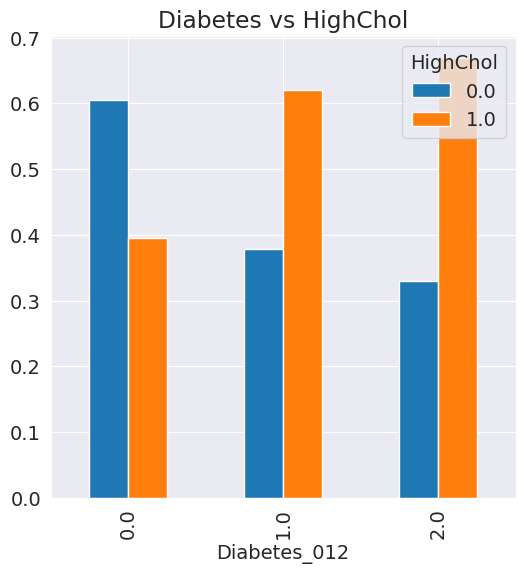

In [25]:
details=pd.crosstab(index=diabetes1_df['Diabetes_012'], columns=diabetes1_df['HighChol'],normalize='index')
details.plot(kind='bar',figsize = (6,6), title='Diabetes vs HighChol');

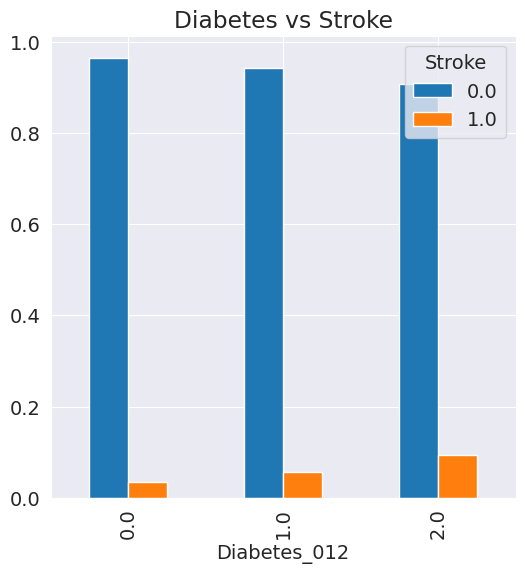

In [26]:
details=pd.crosstab(index=diabetes1_df['Diabetes_012'], columns=diabetes1_df['Stroke'],normalize='index')
details.plot(kind='bar',figsize = (6,6), title='Diabetes vs Stroke');

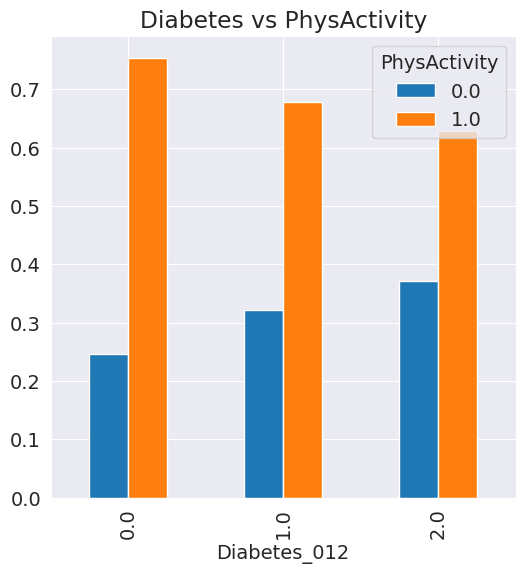

In [27]:
details=pd.crosstab(index=diabetes1_df['Diabetes_012'], columns=diabetes1_df['PhysActivity'],normalize='index')
details.plot(kind='bar',figsize = (6,6), title='Diabetes vs PhysActivity');

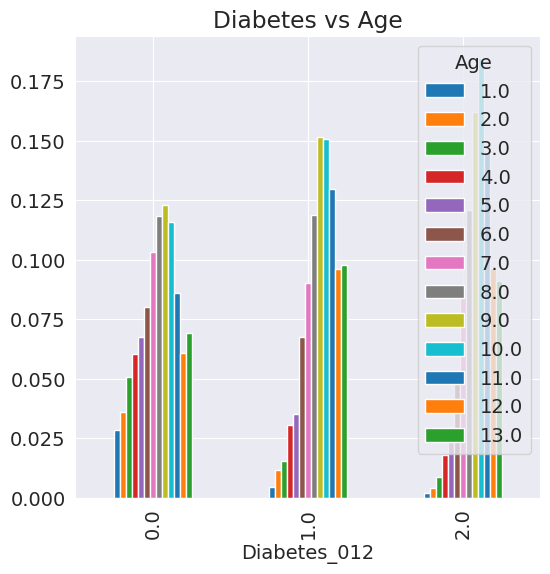

In [28]:
details=pd.crosstab(index=diabetes1_df['Diabetes_012'], columns=diabetes1_df['Age'],normalize='index')
details.plot(kind='bar',figsize = (6,6), title='Diabetes vs Age');

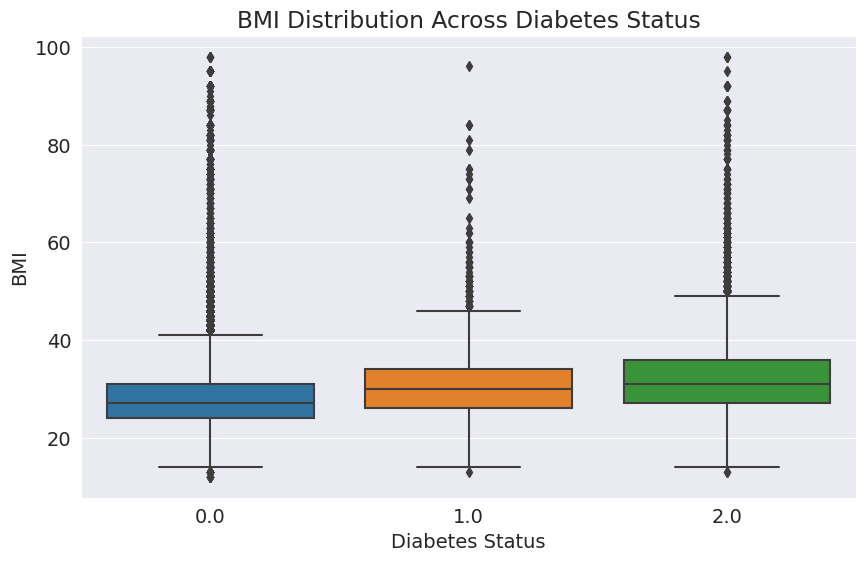

In [29]:
sns.boxplot(x='Diabetes_012', y='BMI', data=diabetes1_df)
plt.xlabel('Diabetes Status')
plt.ylabel('BMI')
plt.title('BMI Distribution Across Diabetes Status')
plt.show()

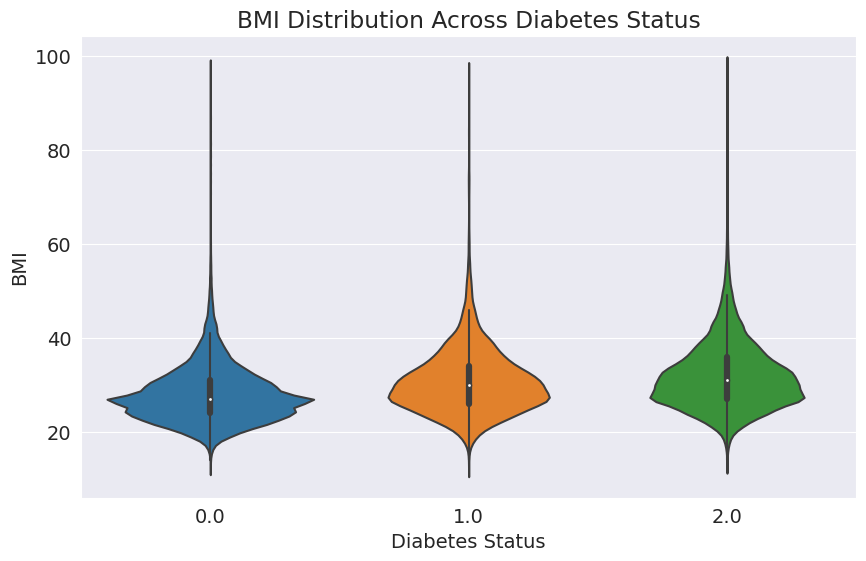

In [30]:
sns.violinplot(x='Diabetes_012', y='BMI', data=diabetes1_df)
plt.xlabel('Diabetes Status')
plt.ylabel('BMI')
plt.title('BMI Distribution Across Diabetes Status')
plt.show()

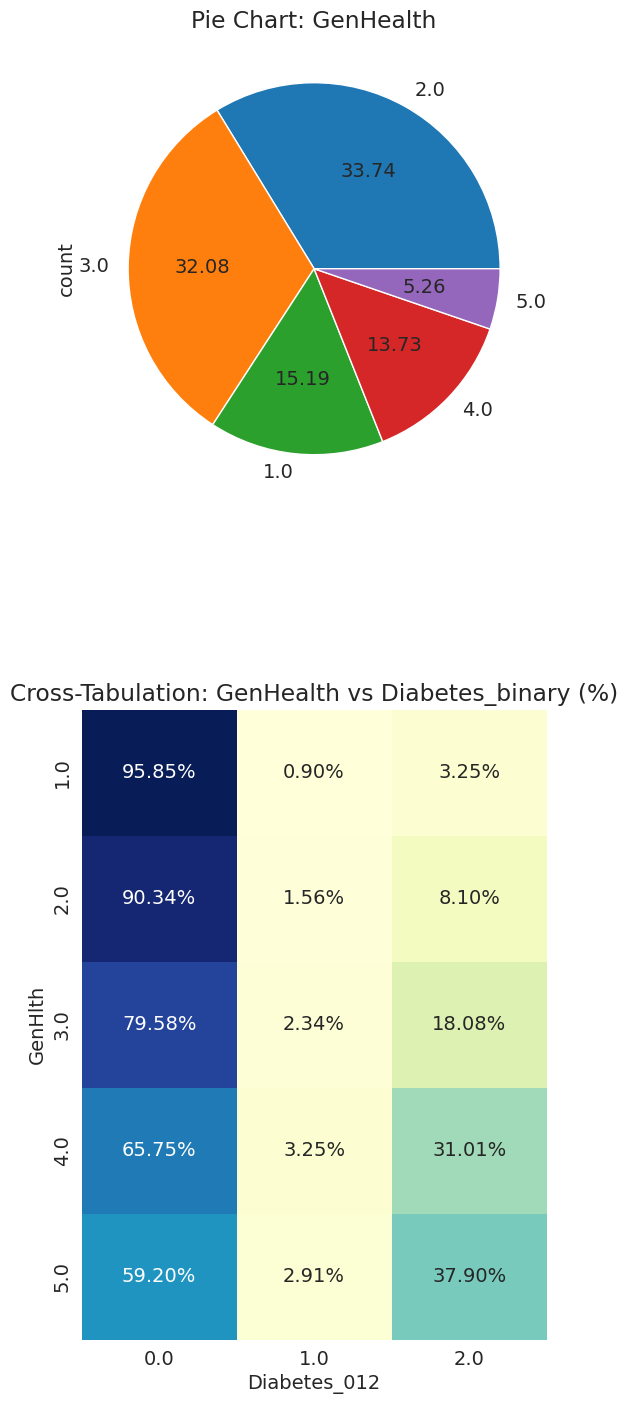

In [31]:
fig, axes = plt.subplots(2, 1, figsize=(6, 18))

diabetes1_df['GenHlth'].value_counts().plot(kind='pie', autopct='%.02f', ax=axes[0])
axes[0].set_title(f'Pie Chart: GenHealth')

contingency_table = pd.crosstab(diabetes1_df['GenHlth'], diabetes1_df['Diabetes_012'], normalize='index')    
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='0.2%', cbar=False, ax=axes[1])
axes[1].set_title(f'Cross-Tabulation: GenHealth vs Diabetes_binary (%)')

plt.show()

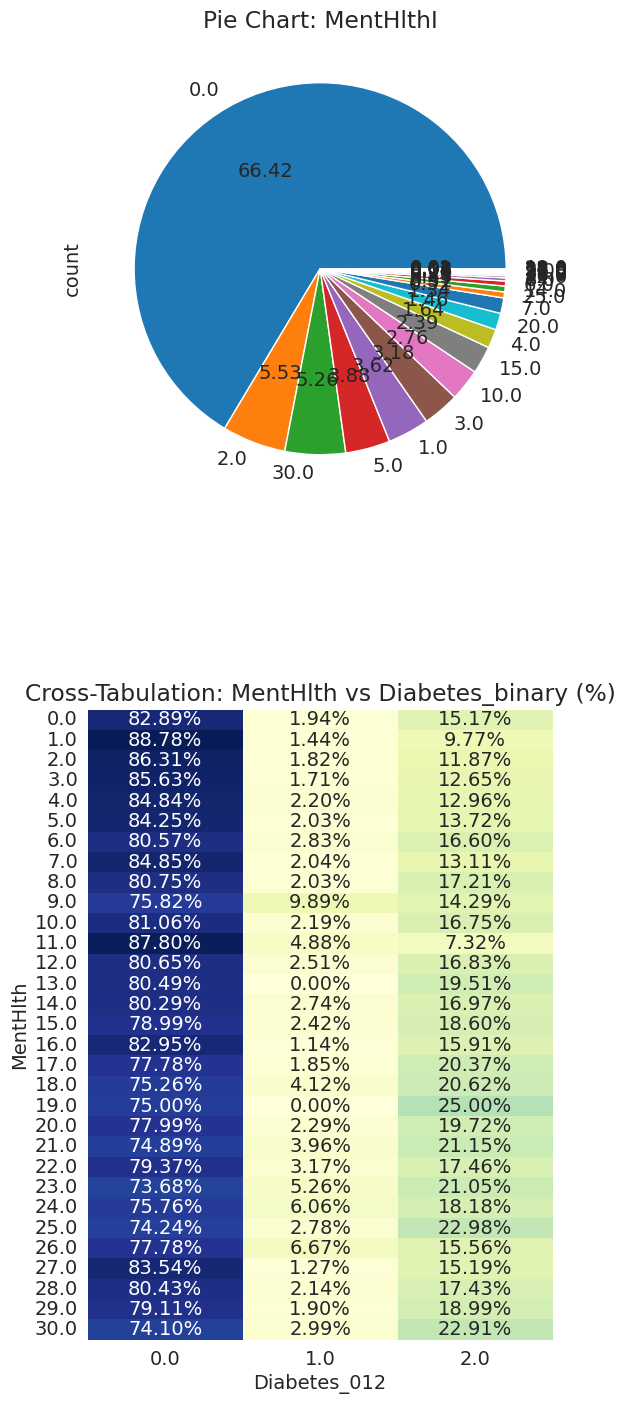

In [32]:
fig, axes = plt.subplots(2, 1, figsize=(6, 18))

diabetes1_df['MentHlth'].value_counts().plot(kind='pie', autopct='%.02f', ax=axes[0])
axes[0].set_title(f'Pie Chart: MentHlthI')

contingency_table = pd.crosstab(diabetes1_df['MentHlth'], diabetes1_df['Diabetes_012'], normalize='index')    
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='0.2%', cbar=False, ax=axes[1])
axes[1].set_title(f'Cross-Tabulation: MentHlth vs Diabetes_binary (%)')

plt.show()

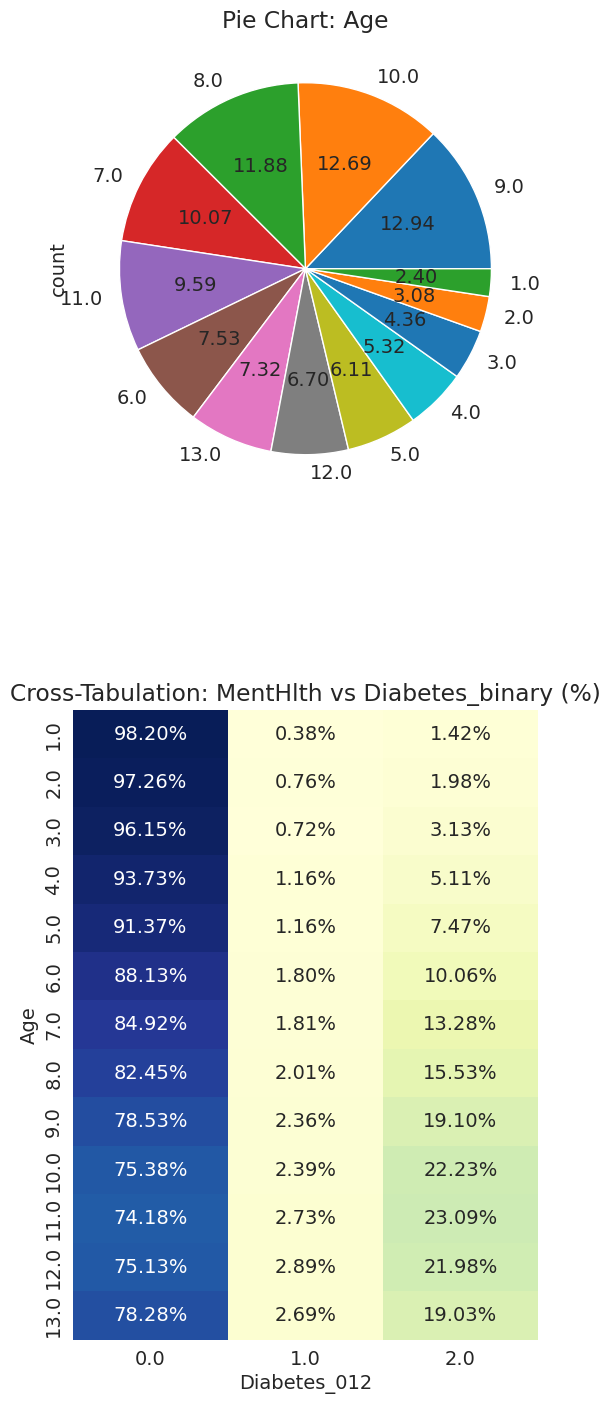

In [33]:
fig, axes = plt.subplots(2, 1, figsize=(6, 18))

diabetes1_df['Age'].value_counts().plot(kind='pie', autopct='%.02f', ax=axes[0])
axes[0].set_title(f'Pie Chart: Age')

contingency_table = pd.crosstab(diabetes1_df['Age'], diabetes1_df['Diabetes_012'], normalize='index')    
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='0.2%', cbar=False, ax=axes[1])
axes[1].set_title(f'Cross-Tabulation: MentHlth vs Diabetes_binary (%)')

plt.show()

# droping less important colunmns

In [34]:
#diabetes1_df_corr = diabetes1_df.corr()['Diabetes_012'].sort_values(ascending=False)
#diabetes_df= diabetes1_df_corr[diabetes1_df_corr > 0.1]
#diabetes_df

In [35]:
"""plt.figure(figsize=(6, 6))
sns.barplot(x=diabetes_df.values, y=diabetes_df.index, palette='viridis')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.title('Correlation of Features with Diabetes_012')
plt.tight_layout()
plt.show()"""


"plt.figure(figsize=(6, 6))\nsns.barplot(x=diabetes_df.values, y=diabetes_df.index, palette='viridis')\nplt.xlabel('Correlation')\nplt.ylabel('Features')\nplt.title('Correlation of Features with Diabetes_012')\nplt.tight_layout()\nplt.show()"

In [36]:
"""x=diabetes1_df
y=diabetes1_df['Diabetes_012']
mutual_scores = mutual_info_regression(x, y)
mutual_relation = pd.DataFrame({'Features': x.columns, 'Mutual_Relation': mutual_scores})
mutual_relation = mutual_relation.sort_values(by='Mutual_Relation', ascending=False)
print(mutual_relation)"""

"x=diabetes1_df\ny=diabetes1_df['Diabetes_012']\nmutual_scores = mutual_info_regression(x, y)\nmutual_relation = pd.DataFrame({'Features': x.columns, 'Mutual_Relation': mutual_scores})\nmutual_relation = mutual_relation.sort_values(by='Mutual_Relation', ascending=False)\nprint(mutual_relation)"

In [37]:
"""plt.figure(figsize=(6, 6))
sns.barplot(x='Mutual_Relation', y='Features', data=mutual_relation, palette='viridis')
plt.xlabel('Mutual Information')
plt.ylabel('Features')
plt.title('Mutual Information with Features for Diabetes_012')
plt.tight_layout()
plt.show()"""

"plt.figure(figsize=(6, 6))\nsns.barplot(x='Mutual_Relation', y='Features', data=mutual_relation, palette='viridis')\nplt.xlabel('Mutual Information')\nplt.ylabel('Features')\nplt.title('Mutual Information with Features for Diabetes_012')\nplt.tight_layout()\nplt.show()"

In [38]:
diabetes1_df.drop(columns=['Education','Income','PhysActivity','Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost'],inplace=True)
diabetes1_df

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
253675           0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676           2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677           0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678           0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679           2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  
0                        0.0      5.0      18.0      15.0       1.0  0.0   9.0  
1                        0.0      3.0       0.0       0.0       0.0  0.0   7.0  
2                        0.0      5.0      30.0      30.0       1.0  0.0   9.0  
3                        0.0      2.0       0.0       0.0       0.0  0.0  11.0  
4                        0.0      2.0       3.0       0.0       0.0  0.0  11.0  
...                      ...      ...       ...       ...       ...  ...   ...  
253675                   0.0      3.0       0.0       5.0       0.0  1.0   5.0  
253676                   0.0      4.0       0.0       0.0       1.0  0.0  11.0  
253677                   0.0      1.0       0.0       0.0       0.0  0.0   2.0  
253678                   0.0      3.0       0.0       0.0       0.0  1.0   7.0  
253679                   1.0      2.0       0.0       0.0       0.0  0.0   9.0  

[229781 rows x 14 columns]

In [39]:
target = diabetes1_df['Diabetes_012']
columns_to_drop = ['Diabetes_012', 'Smoker', 'MentHlth', 'CholCheck', 'PhysHlth', 'HeartDiseaseorAttack', 'Stroke']
features = diabetes1_df.drop(columns_to_drop, axis=1)
features

HighBP  HighChol   BMI  GenHlth  DiffWalk  Sex   Age
0          1.0       1.0  40.0      5.0       1.0  0.0   9.0
1          0.0       0.0  25.0      3.0       0.0  0.0   7.0
2          1.0       1.0  28.0      5.0       1.0  0.0   9.0
3          1.0       0.0  27.0      2.0       0.0  0.0  11.0
4          1.0       1.0  24.0      2.0       0.0  0.0  11.0
...        ...       ...   ...      ...       ...  ...   ...
253675     1.0       1.0  45.0      3.0       0.0  1.0   5.0
253676     1.0       1.0  18.0      4.0       1.0  0.0  11.0
253677     0.0       0.0  28.0      1.0       0.0  0.0   2.0
253678     1.0       0.0  23.0      3.0       0.0  1.0   7.0
253679     1.0       1.0  25.0      2.0       0.0  0.0   9.0

[229781 rows x 7 columns]

# Model Trian

In [40]:
""" target = diabetes1_df['Diabetes_012']
columns_to_drop = ['Diabetes_012', 'Smoker', 'MentHlth', 'CholCheck']
features = diabetes1_df.drop(columns_to_drop, axis=1)
features """

" target = diabetes1_df['Diabetes_012']\ncolumns_to_drop = ['Diabetes_012', 'Smoker', 'MentHlth', 'CholCheck']\nfeatures = diabetes1_df.drop(columns_to_drop, axis=1)\nfeatures "

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled= scaler.fit_transform(features)
print(scaled.shape)

(229781, 7)


In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled, target, test_size=0.2,random_state=42)

print('Train shape:', x_train.shape)
print('Test shape:', x_test.shape)

Train shape: (183824, 7)
Test shape: (45957, 7)


In [43]:
""" from imblearn.over_sampling import ADASYN

adasyn = ADASYN(sampling_strategy='auto', random_state=63)
x_train, y_train = adasyn.fit_resample(x_train, y_train)

print("Class 0 count:", (y_train == 0).sum())
print("Class 1 count:", (y_train== 1).sum())
print("Class 2 count:", (y_train == 2).sum())
 """

' from imblearn.over_sampling import ADASYN\n\nadasyn = ADASYN(sampling_strategy=\'auto\', random_state=63)\nx_train, y_train = adasyn.fit_resample(x_train, y_train)\n\nprint("Class 0 count:", (y_train == 0).sum())\nprint("Class 1 count:", (y_train== 1).sum())\nprint("Class 2 count:", (y_train == 2).sum())\n '

In [44]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.8324955937071611

In [45]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

sgd_clf = make_pipeline(StandardScaler(), SGDClassifier(max_iter=10000, random_state=42))
sgd_clf.fit(x_train, y_train)

y_pred = sgd_clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))


Test Accuracy: 82.94%


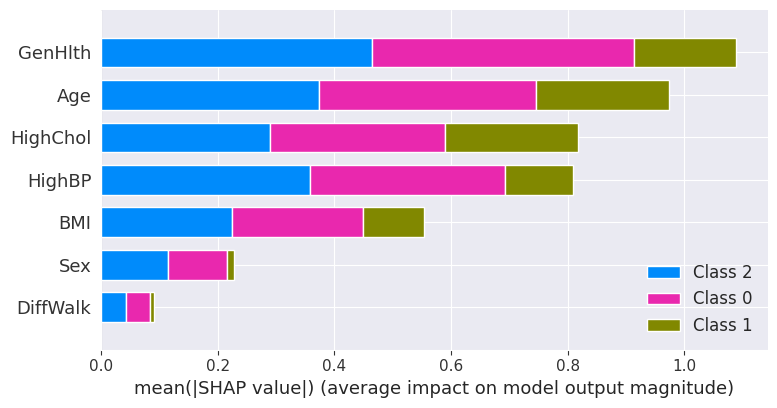

In [46]:
import shap
explainer = shap.Explainer(lr, x_train)
shap_values = explainer.shap_values(x_test[:100])
shap.summary_plot(shap_values, features=x_test[:100], feature_names=features.columns)

In [47]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42).fit(x_train, y_train)

train_preds = model.predict(x_train)
print(train_preds)

[0. 0. 0. ... 0. 0. 0.]


In [48]:
train_preds = model.predict(x_train)
accuracy = accuracy_score(y_train, train_preds) * 100
print("Training Accuracy: {:.2f}%".format(accuracy))

Training Accuracy: 85.38%


In [49]:
train_preds = model.predict(x_test)
accuracy_score(y_test,train_preds)

0.8226603129011902

In [50]:
train_preds = model.predict(x_train)
train_accuracy = accuracy_score(y_train, train_preds)
print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))
test_preds = model.predict(x_test)
test_accuracy = accuracy_score(y_test, test_preds)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

Training Accuracy: 85.38%
Test Accuracy: 82.27%


In [51]:
accuracy_score(y_train,train_preds)*100

85.38330141874837

In [52]:
"""from sklearn.tree import plot_tree
plt.figure(figsize=(80, 20))
plot_tree(model, feature_names=x_train.tolist(), max_depth=3, filled=True)
plt.show()"""

'from sklearn.tree import plot_tree\nplt.figure(figsize=(80, 20))\nplot_tree(model, feature_names=x_train.tolist(), max_depth=3, filled=True)\nplt.show()'

In [53]:
model=DecisionTreeClassifier(max_depth=7, random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [54]:
model.score(x_test, y_test),model.score(x_train,y_train)

(0.8342363513719346, 0.8330359474279746)

In [55]:
train_preds = model.predict(x_train)
train_accuracy = accuracy_score(y_train, train_preds)
print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))
test_preds = model.predict(x_test)
test_accuracy = accuracy_score(y_test, test_preds)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

Training Accuracy: 83.30%
Test Accuracy: 83.42%


In [56]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(x_train, y_train)
    train_acc = 1 - model.score(x_train, y_train)
    return {'Max Depth': md, 'Training Error': train_acc}

In [57]:
errors_df=pd.DataFrame([max_depth_error(md) for md in range(1,21)])
errors_df

Max Depth  Training Error
0           1        0.173454
1           2        0.173454
2           3        0.173454
3           4        0.168999
4           5        0.167225
5           6        0.167225
6           7        0.166964
7           8        0.166115
8           9        0.165049
9          10        0.163716
10         11        0.162253
11         12        0.160137
12         13        0.157651
13         14        0.154822
14         15        0.152058
15         16        0.149757
16         17        0.148256
17         18        0.147271
18         19        0.146803
19         20        0.146559

In [58]:
model=DecisionTreeClassifier(max_depth=6,random_state=42).fit(x_train, y_train)
model.score(x_test, y_test),model.score(x_train,y_train)

(0.8347150597297474, 0.8327748280964401)

In [59]:
train_preds = model.predict(x_train)
train_accuracy = accuracy_score(y_train, train_preds)
print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))
test_preds = model.predict(x_test)
test_accuracy = accuracy_score(y_test, test_preds)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

Training Accuracy: 83.28%
Test Accuracy: 83.47%


In [60]:
model=DecisionTreeClassifier(max_depth=8,max_leaf_nodes=64,random_state=42).fit(x_train, y_train)
model.score(x_test, y_test)

0.8344321866092217

In [61]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_jobs=-1,random_state=42,max_features='log2', min_samples_leaf=100,min_samples_split=500,bootstrap=False)
model.fit(x_train,y_train)
model.score(x_test, y_test)*100,model.score(x_train,y_train)*100

(83.51937680875601, 83.48583427626424)

In [62]:
train_preds = model.predict(x_train)
train_accuracy = accuracy_score(y_train, train_preds)
print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))
test_preds = model.predict(x_test)
test_accuracy = accuracy_score(y_test, test_preds)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

Training Accuracy: 83.49%
Test Accuracy: 83.52%


In [63]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_jobs=-1,random_state=42,max_features=2,min_samples_split=80, min_samples_leaf=50,bootstrap=False)
model.fit(x_train,y_train)
model.score(x_test, y_test),model.score(x_train,y_train)

(0.8348020976129861, 0.8370506571503177)

In [64]:
model=RandomForestClassifier(n_jobs=-1,random_state=42,n_estimators=5,max_depth=7,max_leaf_nodes=64,
                             max_features=2).fit(x_train, y_train)
model.score(x_test, y_test)

0.8348891354962247

In [65]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(learning_rate=.02).fit(x_train,y_train)
model.score(x_test, y_test)*100,model.score(x_train,y_train)*100

(83.48891354962247, 83.30196274697536)

In [66]:
train_preds = gb.predict(x_test)
accuracy_score(y_test,train_preds)

0.8349979328502731

In [67]:
train_preds = gb.predict(x_train)
train_accuracy = accuracy_score(y_train, train_preds)
print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))
test_preds = gb.predict(x_test)
test_accuracy = accuracy_score(y_test, test_preds)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

Training Accuracy: 83.26%
Test Accuracy: 83.50%


In [68]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5,shuffle=False)

In [69]:
from sklearn.model_selection import cross_val_score
rf_model = RandomForestClassifier(n_estimators=10)
cv_scores = cross_val_score(rf_model, x_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)

Cross-validation scores: [0.81754386 0.81778866 0.81664627 0.81419829 0.81623327]


In [70]:
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'),x_train, y_train,cv=3)

array([0.82994696, 0.83071399, 0.83049907])

In [71]:
from sklearn.neighbors import KNeighborsClassifier

model =KNeighborsClassifier(n_neighbors=20) 
model.fit(x_train, y_train)
model.score(x_test, y_test)*100,model.score(x_train,y_train)*100

(83.06460386883391, 83.80244146574984)

In [72]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier(n_estimators=20, random_state=42) 
model.fit(x_train, y_train)
model.score(x_test, y_test)*100,model.score(x_train,y_train)*100

(83.50196923210828, 83.32209069544781)

In [73]:
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(x_train, y_train)
y_pred = xgb_classifier.predict(x_test)
accuracy_xgb = accuracy_score(y_test, y_pred)
print("XGBoost Test Accuracy: {:.2f}%".format(accuracy_xgb * 100))

XGBoost Test Accuracy: 83.59%


In [74]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='micro')
print("F1 Score:", f1)

F1 Score: 0.8358900711534696


In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

logreg_classifier = LogisticRegression(max_iter=1000)
logreg_classifier.fit(x_train_scaled, y_train)

y_pred_logreg = logreg_classifier.predict(x_test_scaled)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Test Accuracy: {:.2f}%".format(accuracy_logreg * 100))

Logistic Regression Test Accuracy: 83.24%


In [76]:
from sklearn.naive_bayes import GaussianNB#Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

Test Accuracy: 79.78%


In [77]:
from sklearn.svm import SVC
sv = SVC().fit(x_train, y_train)
accuracy = sv.score(x_test, y_test)
print("Accuracy on test data:", accuracy)

Accuracy on test data: 0.8342581108427443


In [78]:
pip install interpret-core

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 30.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [79]:
from interpret.glassbox import ExplainableBoostingClassifier
ebm = ExplainableBoostingClassifier(random_state=42).fit(x_train, y_train)

y_pred_ebm = ebm.predict(x_test)
accuracy_ebm = accuracy_score(y_test, y_pred_ebm)
print("Explainable Boosting Classifier Test Accuracy: {:.2f}%".format(accuracy_ebm * 100))

Explainable Boosting Classifier Test Accuracy: 0.00%


Detected multiclass problem. Forcing interactions to 0. Multiclass interactions only have local explanations. They are not currently displayed in the global explanation visualizations. Set interactions=0 to disable this warning. If you still want multiclass interactions, this API accepts a list, and the measure_interactions function can be used to detect them.


In [80]:
param_grid = {
    'n_estimators': [20],
    'max_leaf_nodes': [64, 32, 128],
    'max_features': [0.2, 0.6, 1.0, 3],
    'max_depth': [3, 6, 7],
    'max_samples': [0.5, 0.75, 1.0, 2]
}

print(param_grid)
rf = RandomForestClassifier()
from sklearn.model_selection import GridSearchCV
rf_grid = GridSearchCV(estimator=rf,
                       param_grid=param_grid,
                       cv=5,
                       verbose=2,
                       n_jobs=-1)
rf_grid.fit(x_train, y_train)

print("Best parameters: ", rf_grid.best_params_)
print("Best cross-validation: {:.2f}".format(rf_grid.best_score_))

{'n_estimators': [20], 'max_leaf_nodes': [64, 32, 128], 'max_features': [0.2, 0.6, 1.0, 3], 'max_depth': [3, 6, 7], 'max_samples': [0.5, 0.75, 1.0, 2]}
Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END max_depth=3, max_features=0.2, max_leaf_nodes=64, max_samples=0.5, n_estimators=20; total time=   1.0s
[CV] END max_depth=3, max_features=0.2, max_leaf_nodes=64, max_samples=0.5, n_estimators=20; total time=   1.1s
[CV] END max_depth=3, max_features=0.2, max_leaf_nodes=64, max_samples=0.75, n_estimators=20; total time=   1.2s
[CV] END max_depth=3, max_features=0.2, max_leaf_nodes=64, max_samples=1.0, n_estimators=20; total time=   1.3s
[CV] END max_depth=3, max_features=0.2, max_leaf_nodes=64, max_samples=2, n_estimators=20; total time=   0.5s
[CV] END max_depth=3, max_features=0.2, max_leaf_nodes=64, max_samples=2, n_estimators=20; total time=   0.6s
[CV] END max_depth=3, max_features=0.2, max_leaf_nodes=64, max_samples=2, n_estimators=20; total time=   0.6s
[CV] E

In [81]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Standardize the features (optional but recommended for neural networks)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define the neural network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))


2024-03-01 14:23:48.077468: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-01 14:23:48.077620: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-01 14:23:48.252792: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/50
4596/4596 [==============================] - 11s 2ms/step - loss: 0.3656 - accuracy: 0.6934 - val_loss: 0.2400 - val_accuracy: 0.7169
Epoch 2/50
4596/4596 [==============================] - 10s 2ms/step - loss: -0.2007 - accuracy: 0.7151 - val_loss: -0.9001 - val_accuracy: 0.7033
Epoch 3/50
4596/4596 [==============================] - 10s 2ms/step - loss: -2.3243 - accuracy: 0.6902 - val_loss: -4.4570 - val_accuracy: 0.6769
Epoch 4/50
4596/4596 [==============================] - 10s 2ms/step - loss: -6.9569 - accuracy: 0.6852 - val_loss: -11.1275 - val_accuracy: 0.6670
Epoch 5/50
4596/4596 [==============================] - 10s 2ms/step - loss: -15.1664 - accuracy: 0.6807 - val_loss: -21.4780 - val_accuracy: 0.6729
Epoch 6/50
4596/4596 [==============================] - 10s 2ms/step - loss: -27.4865 - accuracy: 0.6785 - val_loss: -37.5748 - val_accuracy: 0.6767
Epoch 7/50
4596/4596 [==============================] - 11s 2ms/step - loss: -46.4656 - accuracy: 0.6799 - val_loss